In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-05-16 08:25:39--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   186MB/s    in 0.4s    

2020-05-16 08:25:40 (186 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir='/tmp/cats_and_dogs_filtered'

train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [5]:
train_cat_fnames=os.listdir(train_cats_dir)
train_dog_fnames=os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.299.jpg', 'cat.727.jpg', 'cat.892.jpg', 'cat.488.jpg', 'cat.826.jpg', 'cat.859.jpg', 'cat.45.jpg', 'cat.160.jpg', 'cat.412.jpg', 'cat.503.jpg']
['dog.166.jpg', 'dog.324.jpg', 'dog.948.jpg', 'dog.588.jpg', 'dog.505.jpg', 'dog.356.jpg', 'dog.622.jpg', 'dog.130.jpg', 'dog.205.jpg', 'dog.728.jpg']


In [6]:
print('total training cat images: ',len(os.listdir(train_cats_dir)))
print('total training dog images: ',len(os.listdir(train_dogs_dir)))

print('total testing cat images: ',len(os.listdir(validation_cats_dir)))
print('total testing dog images: ',len(os.listdir(validation_dogs_dir)))

total training cat images:  1000
total training dog images:  1000
total testing cat images:  500
total testing dog images:  500


In [0]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
nrows=4
ncols=4
pic_index=0


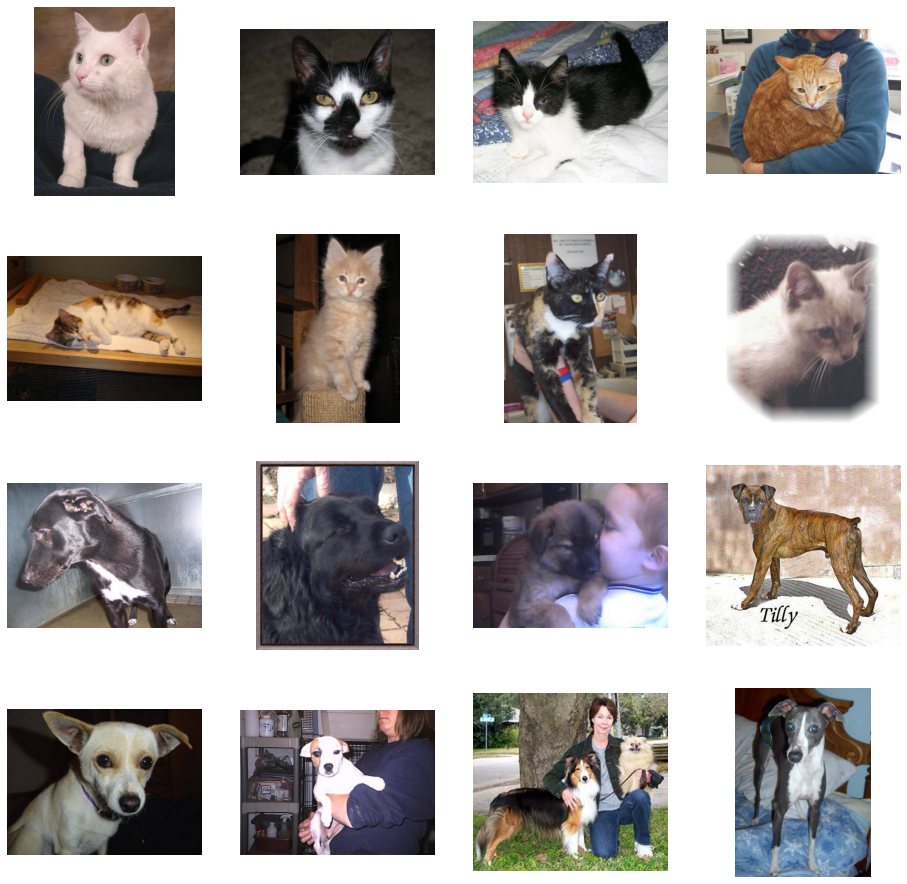

In [10]:
fig=plt.gcf()
fig.set_size_inches(nrows*4,ncols*4)
pic_index+=8

next_cat_pix=[os.path.join(train_cats_dir,fname) for fname in train_cat_fnames[pic_index-8:pic_index]]

next_dog_pix=[os.path.join(train_dogs_dir,fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i,img_path in enumerate(next_cat_pix+next_dog_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [0]:
import tensorflow as tf


In [0]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1.0/255)
test_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode='binary',target_size=(150,150))

validation_generator=test_datagen.flow_from_directory(validation_dir,batch_size=20,class_mode='binary',target_size=(150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
history=model.fit(train_generator,validation_data=validation_generator,steps_per_epoch=100,epochs=15,validation_steps=50,verbose=2)

Epoch 1/15
100/100 - 56s - loss: 0.8464 - accuracy: 0.5540 - val_loss: 0.6696 - val_accuracy: 0.6300
Epoch 2/15
100/100 - 55s - loss: 0.6366 - accuracy: 0.6655 - val_loss: 0.7612 - val_accuracy: 0.5500
Epoch 3/15
100/100 - 55s - loss: 0.5601 - accuracy: 0.7175 - val_loss: 0.6184 - val_accuracy: 0.6540
Epoch 4/15
100/100 - 55s - loss: 0.4739 - accuracy: 0.7790 - val_loss: 0.5827 - val_accuracy: 0.7150
Epoch 5/15
100/100 - 55s - loss: 0.3849 - accuracy: 0.8240 - val_loss: 0.6729 - val_accuracy: 0.7130
Epoch 6/15
100/100 - 55s - loss: 0.3050 - accuracy: 0.8700 - val_loss: 0.7820 - val_accuracy: 0.6990
Epoch 7/15
100/100 - 55s - loss: 0.2158 - accuracy: 0.9150 - val_loss: 0.7751 - val_accuracy: 0.6970
Epoch 8/15
100/100 - 55s - loss: 0.1495 - accuracy: 0.9405 - val_loss: 1.1141 - val_accuracy: 0.6900
Epoch 9/15
100/100 - 55s - loss: 0.1085 - accuracy: 0.9610 - val_loss: 1.1875 - val_accuracy: 0.7190
Epoch 10/15
100/100 - 55s - loss: 0.0843 - accuracy: 0.9680 - val_loss: 1.2561 - val_accura

In [21]:
import numpy as np
from  google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)
  if classes[0]>0:
    print(fn+' is a dog')
  else:
    print(fn+' is a cat')


Saving c.jpg to c.jpg
c.jpg is a cat


Text(0.5, 1.0, 'Training and validation loss')

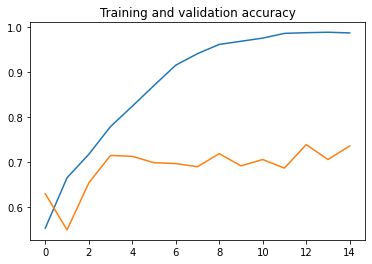

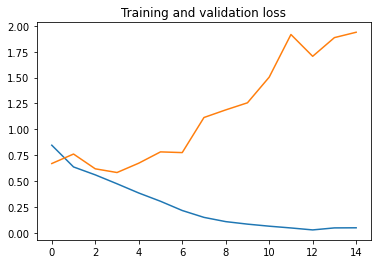

In [22]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [0]:
import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )